In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

# Read and Review the dataset for churn

### Read csv file

In [3]:
print(os.path.exists("Mobile Price Prediction Datatset.csv"))

True


In [4]:
ds = pd.read_csv("Mobile Price Prediction Datatset.csv")

In [5]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  10 

columns:  ['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price']


In [6]:
print('Samples count: ',ds.shape[0])

Samples count:  836


In [30]:
display(ds)


,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.000,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.500,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.500,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.400,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.180,35,15.0,3800,18999
5,5,"Apple iPhone 11 Pro (Space Grey, 512 )",4.7,8.0,128.0,5.800,35,12.0,5000,140300
6,6,"Samsung Galaxy A70s (Prism Crush Red, 128 )",4.4,8.0,128.0,6.700,64,5.0,4700,29999
7,7,"Samsung Galaxy S10 Lite (Prism Blue, 512 )",4.5,8.0,128.0,6.700,48,12.0,4700,47999
8,8,"OPPO A9 (Marble Green, 128 )",4.4,4.0,128.0,6.530,48,2.0,4020,16490
9,9,"POCO F1 (Graphite Black, 256 )",4.5,8.0,256.0,6.180,35,5.0,3800,22999


### Chek missing data

In [8]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [9]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  Ratings
Missing data in  RAM
Missing data in  ROM
Missing data in  Mobile_Size
Missing data in  Selfi_Cam


In [10]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Ratings 31
RAM 7
ROM 4
Mobile_Size 2
Selfi_Cam 269


### Unique values count

In [11]:
ds.nunique()

Unnamed: 0       836
Brand me         427
Ratings           20
RAM               13
ROM               22
Mobile_Size       47
Primary_Cam       11
Selfi_Cam         23
Battery_Power     49
Price            253
dtype: int64

### Distribution statistics

In [12]:
ds.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


### Values type descriptions

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


#  Different types of the plots examples

#### Нижче наведені приклади побудови графіків та діаграм різних типів.

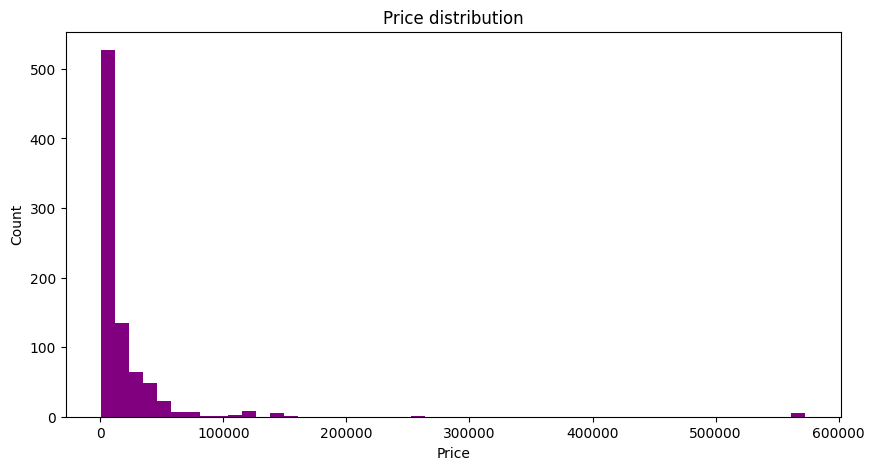

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(ds['Price'], bins=50, color='purple')
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

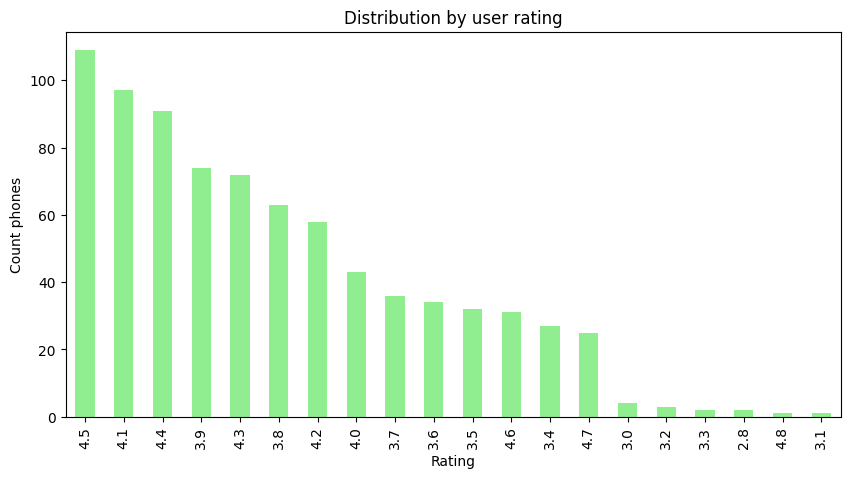

In [15]:
plt.figure(figsize=(10, 5))
ds['Ratings'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution by user rating')
plt.xlabel('Rating')
plt.ylabel('Count phones')
plt.show()

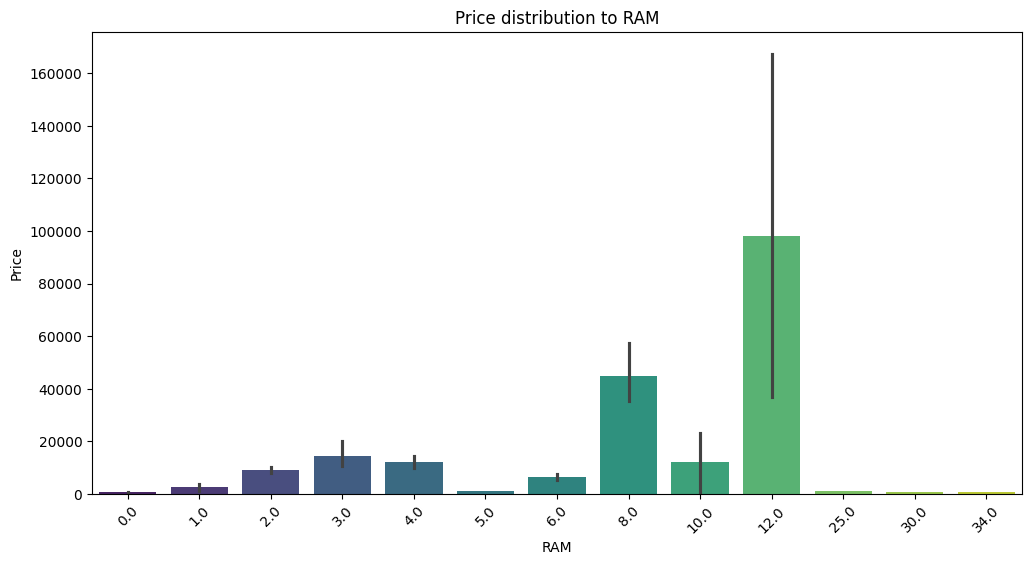

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='RAM', y='Price', data=ds, palette='viridis')
plt.title('Price distribution to RAM')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

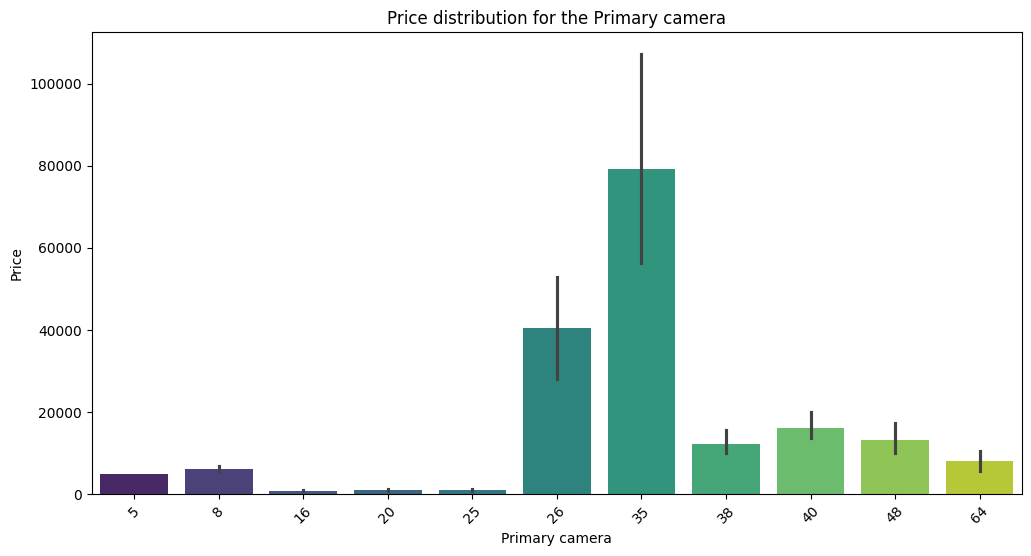

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Primary_Cam', y='Price', data=ds, palette='viridis')
plt.title('Price distribution for the Primary camera')
plt.xlabel('Primary camera')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

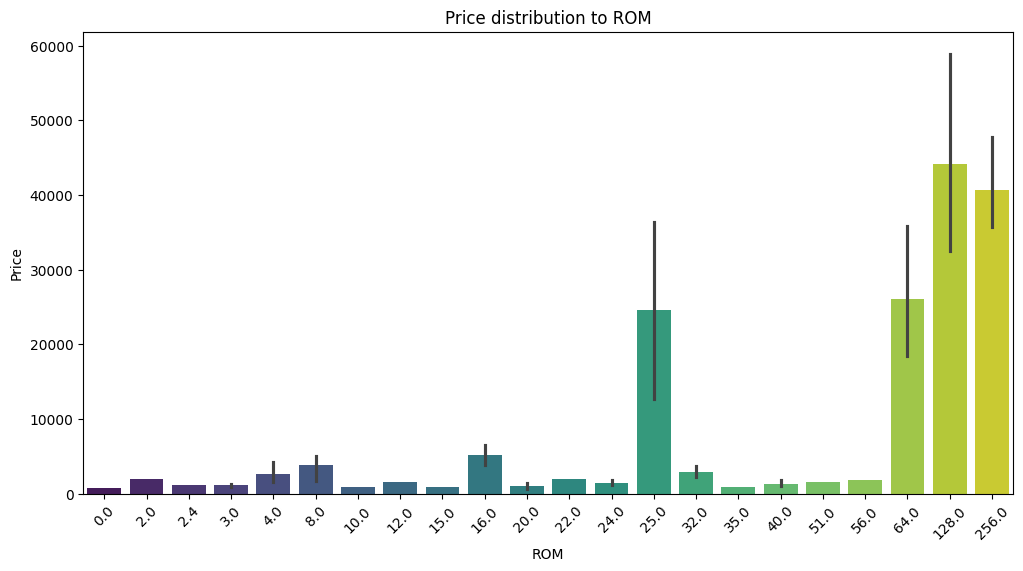

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ROM', y='Price', data=ds, palette='viridis')
plt.title('Price distribution to ROM')
plt.xlabel('ROM')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

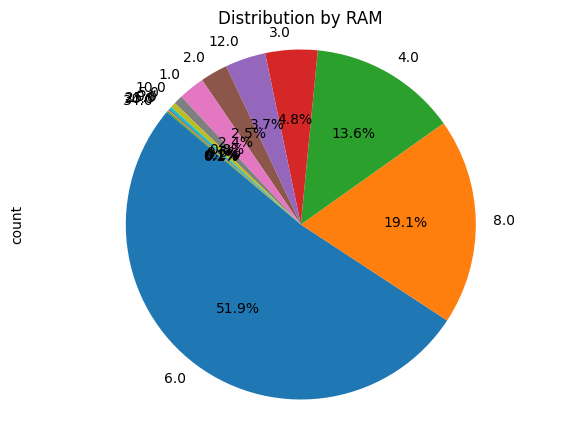

In [19]:
plt.figure(figsize=(7, 5))
ds['RAM'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution by RAM')
plt.axis('equal')
plt.show()

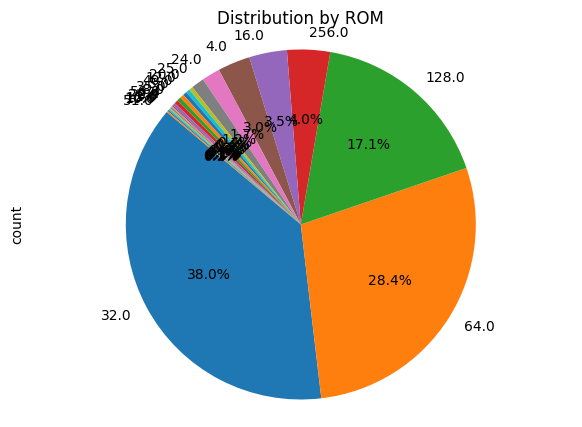

In [20]:
plt.figure(figsize=(7, 5))
ds['ROM'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution by ROM')
plt.axis('equal')
plt.show()

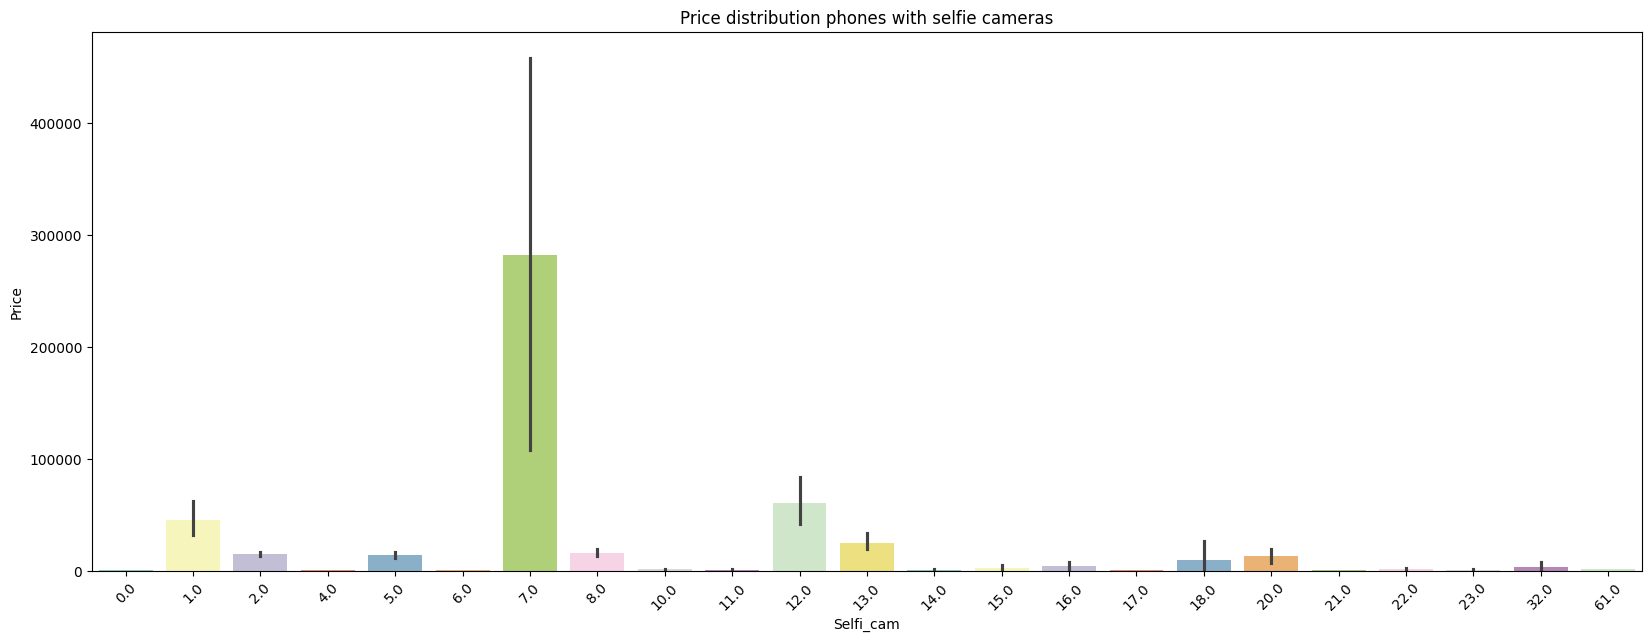

In [21]:
plt.figure(figsize=(20, 7))
sns.barplot(x='Selfi_Cam', y='Price', data=ds, palette='Set3')
plt.title('Price distribution phones with selfie cameras')
plt.xlabel('Selfi_cam')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [22]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


***Since there is no categorical data, there is no need to convert categorical values ​​to numeric values***